# Introduction
Project available at https://github.com/zalandoresearch/fashion-mnist

In [1]:
import tensorflow as tf
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

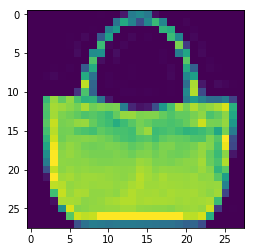

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_images[100])
plt.show()

In [11]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_images_scaled = train_images /255
test_images_scaled = test_images /255
train_images_scaled = train_images_scaled.reshape(60000,28,28,1)
test_images_scaled = test_images_scaled.reshape(10000,28,28,1)

In [15]:
model = tf.keras.models.Sequential ()
model.add(tf.keras.layers.Conv2D(64, 3, activation=tf.nn.relu, input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, 3, activation=tf.nn.relu, input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.train.AdamOptimizer(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total para

In [13]:
class my_callback (tf.keras.callbacks.Callback) :
    def on_epoch_end (self, epoch, logs={}):
        if (logs.get('loss')<0.05):
            print ('Loss reduced substantially, stopping training')
            self.model.stop_training=True
            
callback = my_callback()
model.fit (train_images_scaled, train_labels, epochs=50, callbacks=[callback])
model.evaluate(test_images_scaled, test_labels)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15


InvalidArgumentError: Incompatible shapes: [32,10,2] vs. [32]
	 [[{{node metrics_1/acc/Equal}}]]

In [13]:
print (model.predict(test_images[10].reshape(1, 28,28)))
print (test_labels[10])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
